In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn import preprocessing

In [2]:
mult = 5
def load_file(path):
    data = pd.read_csv(path, sep=',')

    is_benign = data[' Label']=='BENIGN'
    flows_ok = data[is_benign]
    flows_ddos_full = data[~is_benign]

    sizeDownSample = len(flows_ok)*mult # tamanho do set final de dados anomalos

    # downsample majority
    if (len(flows_ok)*mult) < (len(flows_ddos_full)):
        flows_ddos_reduced = resample(flows_ddos_full,
                                         replace = False, # sample without replacement
                                         n_samples = sizeDownSample, # match minority n
                                         random_state = 27) # reproducible results
    else:
        flows_ddos_reduced = flows_ddos_full

    return flows_ok, flows_ddos_reduced


def load_huge_file(path):
    df_chunk = pd.read_csv(path, chunksize=500000)

    chunk_list_ok = []  # append each chunk df here
    chunk_list_ddos = []

    # Each chunk is in df format
    for chunk in df_chunk:
        # perform data filtering
        is_benign = chunk[' Label']=='BENIGN'
        flows_ok = chunk[is_benign]
        flows_ddos_full = chunk[~is_benign]

        if (len(flows_ok)*mult) < (len(flows_ddos_full)):
            sizeDownSample = len(flows_ok)*mult # tamanho do set final de dados anomalos

            # downsample majority
            flows_ddos_reduced = resample(flows_ddos_full,
                                             replace = False, # sample without replacement
                                             n_samples = sizeDownSample, # match minority n
                                             random_state = 27) # reproducible results
        else:
            flows_ddos_reduced = flows_ddos_full

        # Once the data filtering is done, append the chunk to list
        chunk_list_ok.append(flows_ok)
        chunk_list_ddos.append(flows_ddos_reduced)

    # concat the list into dataframe
    flows_ok = pd.concat(chunk_list_ok)
    flows_ddos = pd.concat(chunk_list_ddos)

    return flows_ok, flows_ddos

In [3]:
# file 1
dataset_path = 'D:/amal/01-12/TFTP.csv'
flows_ok, flows_ddos = load_huge_file(dataset_path)
print('file 1 loaded')
# file 2
a,b = load_file('D:/amal/01-12/DrDoS_LDAP.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 2 loaded')

# file 3
a,b = load_file('D:/amal/01-12/DrDoS_MSSQL.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 3 loaded')

# file 4
a,b = load_file('D:/amal/01-12/DrDoS_NetBIOS.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 4 loaded')

# file 5
a,b = load_file('D:/amal/01-12/DrDoS_NTP.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 5 loaded')

# file 6
a,b = load_file('D:/amal/01-12/DrDoS_SNMP.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 6 loaded')

# file 7
a,b = load_file('D:/amal/01-12/DrDoS_SSDP.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 7 loaded')

# file 8
a,b = load_file('D:/amal/01-12/DrDoS_UDP.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 8 loaded')

# file 9
a,b = load_file('D:/amal/01-12/Syn.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 9 loaded')

# file 10
a,b = load_file('D:/amal/01-12/DrDoS_DNS.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 10 loaded')

# file 11
a,b = load_file('D:/amal/01-12/UDPLag.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 11 loaded')

del a,b

samples = flows_ok.append(flows_ddos,ignore_index=True)
samples.to_csv('D:/amal/01-12/export_dataframe.csv', index = None, header=True)

del flows_ddos, flows_ok

C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:30: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:30: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:30: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:30: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:30: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:
C:\Users\M.A\AppData\Local\Temp\ipykernel_362

file 1 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 2 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 3 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 4 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 5 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 6 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 7 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 8 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 9 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 10 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1495661908.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  samples = flows_ok.append(flows_ddos,ignore_index=True)


file 11 loaded


In [4]:
# file 1
flows_ok, flows_ddos = load_file('D:/amal/03-11/LDAP.csv')
print('file 1 loaded')

# file 2
a,b = load_file('D:/amal/03-11/MSSQL.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 2 loaded')

# file 3
a,b = load_file('D:/amal/03-11/NetBIOS.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 3 loaded')

# file 4
a,b = load_file('D:/amal/03-11/PortMap.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 4 loaded')

# file 5
a,b = load_file('D:/amal/03-11/Syn.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 5 loaded')
# file 6

a,b = load_file('D:/amal/03-11/UDP.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 6 loaded')

# file 7
a,b = load_file('D:/amal/03-11/UDPLag.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 7 loaded')

tests = flows_ok.append(flows_ddos,ignore_index=True)
tests.to_csv(r'D:/amal/01-12/export_tests.csv', index = None, header=True) 

del flows_ddos, flows_ok, a, b

C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


file 1 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\644123559.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\644123559.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 2 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\644123559.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\644123559.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 3 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\644123559.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\644123559.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 4 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\644123559.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\644123559.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 5 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\644123559.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\644123559.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 6 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\4269489898.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\644123559.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\644123559.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\644123559.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tests = flows_ok.append(flows_ddos,ignore_index=True)


file 7 loaded


In [6]:
samples.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,192.168.50.7-23.32.166.121-52380-443-6,192.168.50.7,52380,23.32.166.121,443,6,2018-12-01 13:34:28.579374,1,2,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,BENIGN
1,1,192.168.50.7-23.32.166.121-52380-443-6,23.32.166.121,443,192.168.50.7,52380,6,2018-12-01 13:34:28.605293,2,3,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,BENIGN
2,64469,192.168.50.7-23.32.166.121-52380-443-6,23.32.166.121,443,192.168.50.7,52380,6,2018-12-01 13:34:28.605296,218,1,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,BENIGN
3,171,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-12-01 13:34:28.716014,115366430,52,...,1.073087e+00,8.0,4.0,9.613862e+06,2.884856e+05,9988327.0,9110910.0,0,0,BENIGN
4,186,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68,255.255.255.255,67,17,2018-12-01 13:34:29.978670,109157387,16,...,3.774939e+06,10054849.0,2647210.0,1.015194e+07,2.795046e+06,14600796.0,6304546.0,0,0,BENIGN


In [11]:
samples.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [12]:
print('Dimensions of the  dataset:',samples.shape)

Dimensions of the  dataset: (331879, 88)


In [7]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331879 entries, 0 to 331878
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    331879 non-null  int64  
 1   Flow ID                       331879 non-null  object 
 2    Source IP                    331879 non-null  object 
 3    Source Port                  331879 non-null  int64  
 4    Destination IP               331879 non-null  object 
 5    Destination Port             331879 non-null  int64  
 6    Protocol                     331879 non-null  int64  
 7    Timestamp                    331879 non-null  object 
 8    Flow Duration                331879 non-null  int64  
 9    Total Fwd Packets            331879 non-null  int64  
 10   Total Backward Packets       331879 non-null  int64  
 11  Total Length of Fwd Packets   331879 non-null  float64
 12   Total Length of Bwd Packets  331879 non-nul

In [8]:
samples[' Label'].value_counts()
#class 1 not attack
#class 0 attack

TFTP             116936
DrDoS_NTP         71825
BENIGN            56863
UDP-lag           18501
DrDoS_DNS         17010
DrDoS_UDP         10785
DrDoS_MSSQL       10030
DrDoS_NetBIOS      8535
DrDoS_LDAP         8060
DrDoS_SNMP         7535
DrDoS_SSDP         3815
Syn                1960
WebDDoS              24
Name:  Label, dtype: int64

In [9]:
samples.sample(5)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
78138,33000,172.16.0.5-192.168.50.1-62498-6500-17,172.16.0.5,62498,192.168.50.1,6500,17,2018-12-01 13:52:42.264143,1,2,...,0.00000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,1,TFTP
167090,758,172.16.0.5-192.168.50.1-49642-22-6,172.16.0.5,49642,192.168.50.1,22,6,2018-12-01 14:12:16.527487,1135,1,...,0.00000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,1,TFTP
197971,243425,172.16.0.5-192.168.50.1-758-36029-17,172.16.0.5,758,192.168.50.1,36029,17,2018-12-01 11:56:06.530772,1,2,...,0.00000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,1,DrDoS_NetBIOS
8147,1393,192.168.50.7-72.21.91.29-52722-80-6,192.168.50.7,52722,72.21.91.29,80,6,2018-12-01 14:17:37.446791,116060772,31,...,24238.99489,108359.0,27901.0,9.998614e+06,15112.877002,10003241.0,9953047.0,ocsp.digicert.com/,0,BENIGN
172346,9830,172.16.0.5-192.168.50.1-17808-22-6,172.16.0.5,17808,192.168.50.1,22,6,2018-12-01 16:38:18.877967,9933188,33,...,0.00000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,1,TFTP


In [10]:
missing_values = samples.isnull().sum()
total_missing = missing_values.sum()
print("\nsamples_total_missing_in_data", total_missing)


samples_total_missing_in_data 2343


In [14]:
# training data
import numpy as np
# seed to remove randomness and reproduce results
np.random.seed(10)
samples = pd.read_csv('D:/Dataset/01-12/export_dataframe.csv', sep=',')
##########
def string2numeric_hash(text):
    import hashlib
    return int(hashlib.md5(text).hexdigest()[:8], 16)

# Flows Packet/s e Bytes/s - Replace infinity by 0
samples = samples.replace('Infinity','0')
samples = samples.replace(np.inf,0)
#samples = samples.replace('nan','0')
samples[' Flow Packets/s'] = pd.to_numeric(samples[' Flow Packets/s'])

samples['Flow Bytes/s'] = samples['Flow Bytes/s'].fillna(0)
samples['Flow Bytes/s'] = pd.to_numeric(samples['Flow Bytes/s'])


#Label
samples[' Label'] = samples[' Label'].replace('BENIGN',0)
samples[' Label'] = samples[' Label'].replace('DrDoS_DNS',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_LDAP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_MSSQL',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_NTP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_NetBIOS',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_SNMP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_SSDP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_UDP',1)
samples[' Label'] = samples[' Label'].replace('Syn',1)
samples[' Label'] = samples[' Label'].replace('TFTP',1)
samples[' Label'] = samples[' Label'].replace('UDP-lag',1)
samples[' Label'] = samples[' Label'].replace('WebDDoS',1)

#Timestamp - Drop day, then convert hour, minute and seconds to hashing 
colunaTime = pd.DataFrame(samples[' Timestamp'].str.split(' ',1).tolist(), columns = ['dia','horas'])
colunaTime = pd.DataFrame(colunaTime['horas'].str.split('.',1).tolist(),columns = ['horas','milisec'])
stringHoras = pd.DataFrame(colunaTime['horas'].str.encode('utf-8'))
samples[' Timestamp'] = pd.DataFrame(stringHoras['horas'].apply(string2numeric_hash))#colunaTime['horas']
del colunaTime,stringHoras


# flowID - IP origem - IP destino - Simillar HTTP -> Drop (individual flow analysis)
del samples[' Source IP']
del samples[' Destination IP']
del samples['Flow ID']
del samples['SimillarHTTP']
del samples['Unnamed: 0']

samples.to_csv(r'D:/Dataset/01-12/export_dataframe_proc.csv', index = None, header=True) 
print('Training data processed')

C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1433672869.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  samples = pd.read_csv('D:/Dataset/01-12/export_dataframe.csv', sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1433672869.py:37: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  colunaTime = pd.DataFrame(samples[' Timestamp'].str.split(' ',1).tolist(), columns = ['dia','horas'])
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1433672869.py:38: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  colunaTime = pd.DataFrame(colunaTime['horas'].str.split('.',1).tolist(),columns = ['horas','milisec'])


Training data processed


In [15]:
####################### test data
tests = pd.read_csv('D:/Dataset/01-12/export_tests.csv', sep=',')
 
def string2numeric_hash(text):
    import hashlib
    return int(hashlib.md5(text).hexdigest()[:8], 16)

# Flows Packet/s e Bytes/s - Change infinity by 0
tests = tests.replace('Infinity','0')
tests = tests.replace(np.inf,0)
#amostras = amostras.replace('nan','0')
tests[' Flow Packets/s'] = pd.to_numeric(tests[' Flow Packets/s'])

tests['Flow Bytes/s'] = tests['Flow Bytes/s'].fillna(0)
tests['Flow Bytes/s'] = pd.to_numeric(tests['Flow Bytes/s'])


#Label
tests[' Label'] = tests[' Label'].replace('BENIGN',0)
tests[' Label'] = tests[' Label'].replace('LDAP',1)
tests[' Label'] = tests[' Label'].replace('NetBIOS',1)
tests[' Label'] = tests[' Label'].replace('MSSQL',1)
tests[' Label'] = tests[' Label'].replace('Portmap',1)
tests[' Label'] = tests[' Label'].replace('Syn',1)
#tests[' Label'] = tests[' Label'].replace('DrDoS_SNMP',1)
#tests[' Label'] = tests[' Label'].replace('DrDoS_SSDP',1)

#Timestamp - Drop day, then convert hour, minute and seconds to hashing 
colunaTime = pd.DataFrame(tests[' Timestamp'].str.split(' ',1).tolist(), columns = ['dia','horas'])
colunaTime = pd.DataFrame(colunaTime['horas'].str.split('.',1).tolist(),columns = ['horas','milisec'])
stringHoras = pd.DataFrame(colunaTime['horas'].str.encode('utf-8'))
tests[' Timestamp'] = pd.DataFrame(stringHoras['horas'].apply(string2numeric_hash))#colunaTime['horas']
del colunaTime,stringHoras

# flowID - IP origem - IP destino - Simillar HTTP -> Deletar (analise fluxo a fluxo)
del tests[' Source IP']
del tests[' Destination IP']
del tests['Flow ID']
del tests['SimillarHTTP']
del tests['Unnamed: 0']

tests.to_csv(r'D:/Dataset/01-12/export_tests_proc.csv', index = None, header=True) 
print('Test data processed')

C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\893275818.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  tests = pd.read_csv('D:/Dataset/01-12/export_tests.csv', sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\893275818.py:29: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  colunaTime = pd.DataFrame(tests[' Timestamp'].str.split(' ',1).tolist(), columns = ['dia','horas'])
C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\893275818.py:30: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  colunaTime = pd.DataFrame(colunaTime['horas'].str.split('.',1).tolist(),columns = ['horas','milisec'])


Test data processed


In [16]:
def train_test(samples):
    # Import `train_test_split` from `sklearn.model_selection`
    #CROSS validation
    from sklearn.model_selection import train_test_split
    X=samples.iloc[:,0:(samples.shape[1]-1)]

    y= samples.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    return X_train, X_test, y_train, y_test


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
 
# Split the data into training, validation, and test datasets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
 
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)
 
# Make predictions on the validation dataset
y_pred = model.predict(X_val)
 
# Evaluate the model performance on the validation dataset
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")
 
# Make predictions on the test dataset
y_pred_test = model.predict(X_test)
 
# Evaluate the model performance on the test dataset
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy_test}")

In [17]:
def normalize_data(X_train,X_test):
    # Import `StandardScaler` from `sklearn.preprocessing`
    from sklearn.preprocessing import StandardScaler,MinMaxScaler
    
    # Define the scaler 
    #scaler = StandardScaler().fit(X_train)
    scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
    
    # Scale the train set
    X_train = scaler.transform(X_train)
    
    # Scale the test set
    X_test = scaler.transform(X_test)
    
    return X_train, X_test

In [18]:
# Reshape data input

def format_3d(df):
    
    X = np.array(df)
    return np.reshape(X, (X.shape[0], X.shape[1], 1))

def format_2d(df):
    
    X = np.array(df)
    return np.reshape(X, (X.shape[0], X.shape[1]))

In [19]:
from keras.models import Sequential
from keras.layers import Dense, GRU, Embedding, Dropout, Flatten, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [20]:
#input_size
# -> CIC-DDoS2019 82
# -> CIC-IDS2018 78

def GRU_model(input_size):
   
    # Initialize the constructor
    model = Sequential()
    
    model.add(GRU(32, input_shape=(input_size,1), return_sequences=False)) #
    model.add(Dropout(0.5))    
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.build()
    print(model.summary())
    
    return model

In [21]:
def CNN_model(input_size):
   
    # Initialize the constructor
    model = Sequential()
    
    model.add(Conv1D(filters=64, kernel_size=8, activation='relu', input_shape=(input_size,1)))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(filters=32, kernel_size=16, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(2))
    
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    print(model.summary())
    
    return model

In [22]:
def DNN_model(input_size):
   
    # Initialize the constructor
    model = Sequential()
    
    model.add(Dense(2, activation='relu', input_shape=(input_size,)))
    #model.add(Dense(100, activation='relu'))   
    #model.add(Dense(40, activation='relu'))
    #model.add(Dense(10, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    print(model.summary())
    
    return model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense

def BiLSTM_model(input_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(32), input_shape=(input_size, 1)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    print(model.summary())

    return model

In [24]:
def ANN_model(input_size):
    model = Sequential()
    model.add(Dense(64, input_dim=input_size, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    print(model.summary())
    return model

# Example usage
#input_size = 10
#DNN_model = DNN_model(input_size)

In [25]:
def LSTM_model(input_size):
   
    # Initialize the constructor
    model = Sequential()
    
    model.add(LSTM(32,input_shape=(input_size,1), return_sequences=False))
    model.add(Dropout(0.5))    
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    print(model.summary())
    
    return model

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

def G_C_hybrid_model():
    model = keras.Sequential()
    
    # Conv1D layers
    model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(input_size,1)))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(16, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(Dropout( 0.4556))
    # LSTM layer
   # model.add(layers.LSTM(64, return_sequences=True))
    
    # GRU layer
    model.add(layers.GRU(28, return_sequences=True))
    model.add(Dropout(0.5))
    # Flatten layer
    #model.add(layers.Flatten())
    
    # Dense layers
    
    #model.add(layers.Dense(64, activation='relu'))
    #model.add(layers.Dense(1, activation='sigmoid'))
    print(model.summary())
    
    return model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, GRU, Dropout 

def CNN_GRU_model(input_size):

    model = Sequential()
    
    # CNN Layers
    model.add(Conv1D(filters=64, kernel_size=8, activation='relu', input_shape=(input_size, 1)))
    model.add(MaxPooling1D(pool_size=2)) 
    model.add(Conv1D(filters=32, kernel_size=16, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    # Flatten output for GRU
    model.add(Flatten())
    
    # GRU Layer
    model.add(GRU(units=32, activation='relu'))
    
    # Dense Layers
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    print(model.summary())

    return model


In [28]:
def GRU_BiLSTM_model(input_size):
    model = Sequential()
    
    # GRU Layer
    model.add(GRU(64, return_sequences=True, input_shape=(input_size,1)))
    
    # Bidirectional LSTM Layer
    model.add(Bidirectional(LSTM(32)))
    
    # Fully Connected Layers
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    print(model.summary())
    
    return model

In [29]:
def SVM():
    return SVC(kernel='linear')

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
def gradient_boosting():
    return GradientBoostingClassifier(n_estimators=100, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
def random_forest():
    return RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [32]:
from sklearn.tree import DecisionTreeClassifier
def decision_tree():
    return DecisionTreeClassifier(random_state=42)

In [33]:
import xgboost
#xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=1)
from xgboost import XGBClassifier 
def xgboost():
    return XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [34]:
def LR():
    return LogisticRegression()

In [35]:
def GD():
    return SGDClassifier()

In [36]:
def kNN():
    return KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

In [37]:
from sklearn.naive_bayes import GaussianNB
def gnb():
    return GaussianNB()

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
def Model_ETC():
    return ExtraTreesClassifier(n_estimators=10, random_state=42)

In [39]:
# compile and train learning model
import matplotlib.pyplot as plt
def compile_train(model, X_train, y_train, X_val, y_val, deep=True):
    
    start_time = time.time()
    
    if(deep==True):
        model.compile(
            loss='binary_crossentropy', 
            optimizer='adam',
            metrics=['accuracy']
        )
        
        history = model.fit(
            X_train, 
            y_train,
            epochs=10, 
            batch_size=256, 
            verbose=1,
            validation_data=(X_val, y_val)
        )
             
# Plot the accuracy graph
        accuracy = history.history['accuracy']
        val_accuracy = history.history['val_accuracy']
        epochs = range(1, len(accuracy) + 1)

        plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
# Plot training & validation loss values
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])

        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()
        print(model.metrics_names)
    else:
         model.fit(X_train, y_train)

    end_time = time.time()
    train_time = end_time - start_time
    
    start_time = time.time()
    loss, accuracy = model.evaluate(X_val, y_val)
    end_time = time.time()
    test_time = end_time - start_time

    print(f'Training Time: {train_time:.3f}s') 
    print(f'Testing Time: {test_time:.3f}s')
         
    loss, accuracy = model.evaluate(X_val, y_val)
    print(f'Validation Loss: {loss:.4f}')
    print(f'Validation Accuracy: {accuracy:.4f}')
    
    return model
import matplotlib.pyplot as plt

In [40]:
def testes(model, X_test, y_test, y_pred, deep=True):
    
    start_time = time.time()
    
    if (deep == True):
        score = model.evaluate(X_test, y_test, verbose=1)
        print(score)

    # Alguns testes adicionais
    # y_test = formatar2d(y_test)
    # y_pred = formatar2d(y_pred)
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print('\nAccuracy')
    print(acc)

    # Precision
    prec = precision_score(y_test, y_pred)  # ,average='macro')
    print('\nPrecision')
    print(prec)

    # Recall
    rec = recall_score(y_test, y_pred)  # ,average='macro')
    print('\nRecall')
    print(rec)

    # F1 score
    f1 = f1_score(y_test, y_pred)  # ,average='macro')
    print('\nF1 Score')
    print(f1)

    # False Positive Rate (FPR)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fpr = fp / (fp + tn)
    print('\nFalse Positive Rate (FPR)')
    print(fpr)

    # Average
    avrg = (acc + prec + rec + f1 + fpr) / 5
    print('\nAverage (acc, prec, rec, f1, FPR)')
    print(avrg)

    end_time = time.time()
    train_time = end_time - start_time
    test_time = end_time - start_time

    print(f'\nTesting Time: {test_time:.3f}s')
    print(f'Training Time: {train_time:.3f}s') 
    return acc, prec, rec, f1, fpr, avrg, test_time, train_time


In [41]:
def test_normal_atk(y_test,y_pred):
    df = pd.DataFrame()
    df['y_test'] = y_test
    df['y_pred'] = y_pred
    
    normal = len(df.query('y_test == 0'))
    atk = len(y_test)-normal
    
    wrong = df.query('y_test != y_pred')
    
    normal_detect_rate = (normal - wrong.groupby('y_test').count().iloc[0][0]) / normal
    atk_detect_rate = (atk - wrong.groupby('y_test').count().iloc[1][0]) / atk
    
    #print(normal_detect_rate,atk_detect_rate)
    
    return normal_detect_rate, atk_detect_rate

In [42]:
# Save model and weights

def save_model(model,name):
    from keras.models import model_from_json
    
    arq_json = 'Models/' + name + '.json'
    model_json = model.to_json()
    with open(arq_json,"w") as json_file:
        json_file.write(model_json)
    
    arq_h5 = 'Models/' + name + '.h5'
    model.save_weights(arq_h5)
    print('Model Saved')
    
def load_model(name):
    from keras.models import model_from_json
    
    arq_json = 'Models/' + name + '.json'
    json_file = open(arq_json,'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    
    arq_h5 = 'Models/' + name + '.h5'
    loaded_model.load_weights(arq_h5)
    
    print('Model loaded')
    
    return loaded_model

def save_Sklearn(model,nome):
    import pickle
    arquivo = 'Models/'+ nome + '.pkl'
    with open(arquivo,'wb') as file:
        pickle.dump(model,file)
    print('Model sklearn saved')

def load_Sklearn(nome):
    import pickle
    arquivo = 'Models/'+ nome + '.pkl'
    with open(arquivo,'rb') as file:
        model = pickle.load(file)
    print('Model sklearn loaded')
    return model

In [43]:
# UPSAMPLE OF NORMAL FLOWS
    
samples = pd.read_csv('D:/Dataset/01-12/export_dataframe_proc.csv', sep=',')

X_train, X_test, y_train, y_test = train_test(samples)
#5 croos 20 param

#junta novamente pra aumentar o numero de normais
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
is_benign = X[' Label']==0 #base de dados toda junta

normal = X[is_benign]
ddos = X[~is_benign]

# upsample minority
normal_upsampled = resample(normal,
                          replace=True, # sample with replacement
                          n_samples=len(ddos), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([normal_upsampled, ddos])

# Specify the data 
X_train=upsampled.iloc[:,0:(upsampled.shape[1]-1)]    #DDoS
y_train= upsampled.iloc[:,-1]  #DDoS

input_size = (X_train.shape[1], 1)

del X, normal_upsampled, ddos, upsampled, normal #, l1, l2

In [45]:
tests = pd.read_csv('D:/amal/01-12/export_tests_proc.csv', sep=',')

# X_test = np.concatenate((X_test,(tests.iloc[:,0:(tests.shape[1]-1)]).to_numpy())) # testar 33% + dia de testes
# y_test = np.concatenate((y_test,tests.iloc[:,-1]))

del X_test,y_test                            # testar só o dia de testes
X_test = tests.iloc[:,0:(tests.shape[1]-1)]                        
y_test = tests.iloc[:,-1]

# print((y_test.shape))
# print((X_test.shape))

X_train, X_test = normalize_data(X_train,X_test)

In [46]:
results = pd.DataFrame(columns=['Method','Accuracy','Precision','Recall', 'F1_Score', 'Average',
                                'Normal_Detect_Rate','Atk_Detect_Rate',
                                'Training_Time', 'Testing_Time'])

In [47]:
from keras.layers import LSTM
model_Bilstm = BiLSTM_model(82)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 64)                8704      
 al)                                                             
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9365 (36.58 KB)
Trainable params: 9365 (36.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/10
1440/1440 [==============================] - 136s 92ms/step - loss: 0.1139 - accuracy: 0.9654 - val_loss: 0.1243 - val_accuracy: 0.9640
Epoch 2/10
1440/1440 [==============================] - 129s 90ms/step - loss: 0.0324 - accuracy: 0.9909 - val_loss: 0.0872 - val_accuracy: 0.9784
Epoch 3/10
1440/1440 [==============================] - 122s 85ms/step - loss: 0.0140 - accuracy: 0.9968 - val_loss: 0.0147 - val_accuracy: 0.9978
Epoch 4/10
1440/1440 [==============================] - 132s 91ms/step - loss: 0.0097 - accuracy: 0.9977 - val_loss: 0.0152 - val_accuracy: 0.9975
Epoch 5/10
1440/1440 [==============================] - 118s 82ms/step - loss: 0.0080 - accuracy: 0.9979 - val_loss: 0.0212 - val_accuracy: 0.9936
Epoch 6/10
1440/1440 [==============================] - 117s 81ms/step - loss: 0.0069 - accuracy: 0.9981 - val_loss: 0.0097 - val_accuracy: 0.9975
Epoch 7/10
1440/1440 [==============================] - 117s 81ms/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0

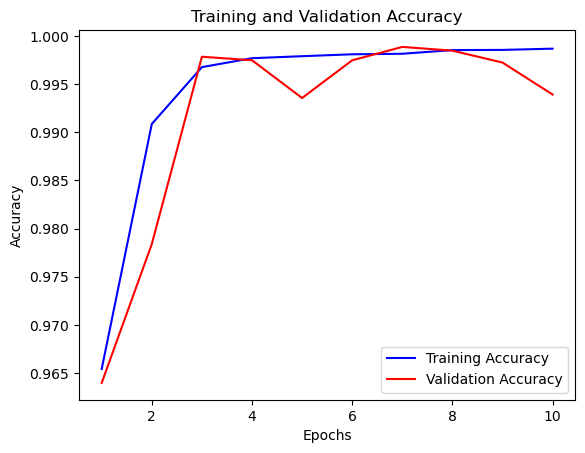

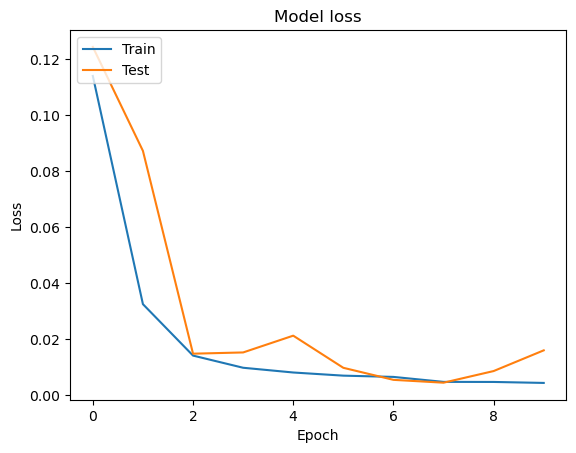

['loss', 'accuracy']
9331/9331 [==============================] - 55s 6ms/step - loss: 0.0159 - accuracy: 0.9939
Training Time: 1228.450s
Testing Time: 54.873s
9331/9331 [==============================] - 54s 6ms/step - loss: 0.0159 - accuracy: 0.9939
Validation Loss: 0.0159
Validation Accuracy: 0.9939


In [48]:
import time
model_Bilstm = compile_train(model_Bilstm,format_3d(X_train), y_train, format_3d(X_test), y_test)

In [49]:
y_pred = model_Bilstm.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(model_Bilstm,format_3d(X_test),y_test,y_pred)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'model_Bilstm', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)


9331/9331 [==============================] - 72s 8ms/step - loss: 0.0159 - accuracy: 0.9939
[0.015907855704426765, 0.9939144849777222]

Accuracy
0.9939144880064841

Precision
0.9997248456303058

Recall
0.9929706810280731

F1 Score
0.9963363168390298

False Positive Rate (FPR)
0.0013664771014609248

Average (acc, prec, rec, f1, FPR)
0.7968625617210707

Testing Time: 72.561s
Training Time: 72.561s


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\2940937418.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'model_Bilstm', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 64)                8704      
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9365 (36.58 KB)
Trainable params: 9365 (36.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


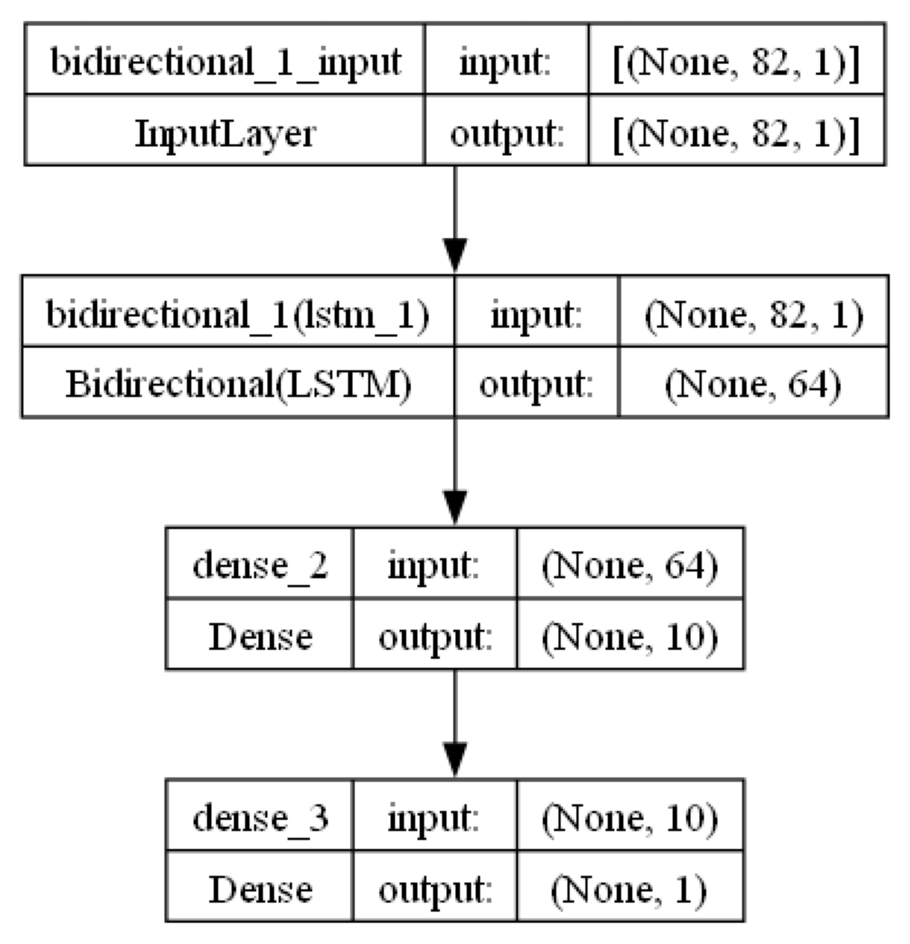

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

def BiLSTM_model(input_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(32), input_shape=(input_size, 1)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    print(model.summary())
    
    # Generate the model plot
    plot_model(BiLSTM_model, to_file='BiLSTM_model_architecture.png', show_shapes=True, show_layer_names=True)
    
    # Display the plot
    img = plt.imread('BiLSTM_model_architecture.png')
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    return model

# Example usage
input_size = 82  # Replace with your actual input size
model = BiLSTM_model(input_size)

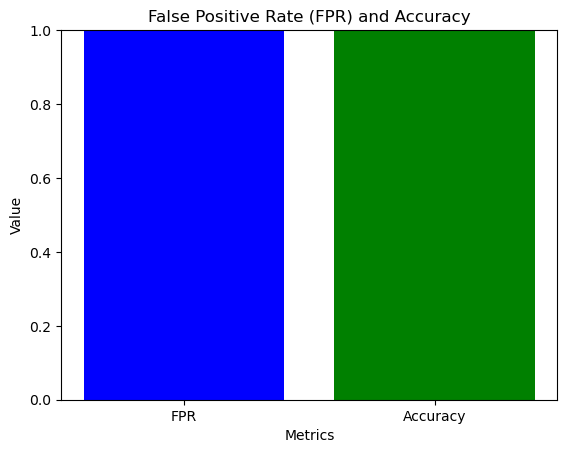

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.bar(['FPR', 'Accuracy'], [fpr * 100, acc *100], color=['blue', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('False Positive Rate (FPR) and Accuracy')
plt.ylim([0, 1])
plt.show()

In [53]:
gru_bilstm = GRU_BiLSTM_model(82)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 82, 64)            12864     
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 38753 (151.38 KB)
Trainable params: 38753 (151.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/10
1440/1440 [==============================] - 424s 291ms/step - loss: 0.0892 - accuracy: 0.9696 - val_loss: 0.0626 - val_accuracy: 0.9764
Epoch 2/10
1440/1440 [==============================] - 442s 307ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.0078 - val_accuracy: 0.9975
Epoch 3/10
1440/1440 [==============================] - 526s 365ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0055 - val_accuracy: 0.9993
Epoch 4/10
1440/1440 [==============================] - 453s 314ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0088 - val_accuracy: 0.9967
Epoch 5/10
1440/1440 [==============================] - 429s 298ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 6/10
1440/1440 [==============================] - 382s 265ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.0058 - val_accuracy: 0.9986
Epoch 7/10
1440/1440 [==============================] - 387s 269ms/step - loss: 0.0032 - accuracy: 0.9989 - val_

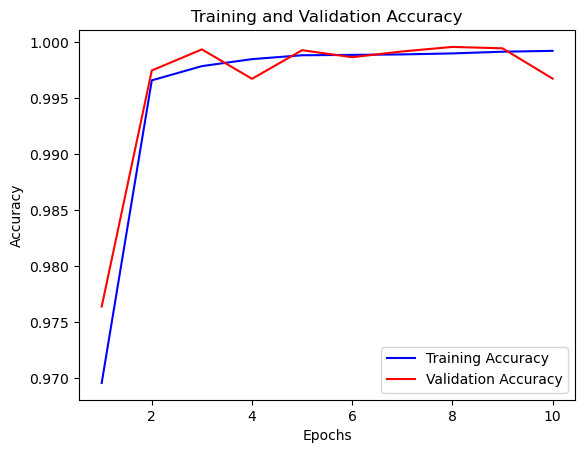

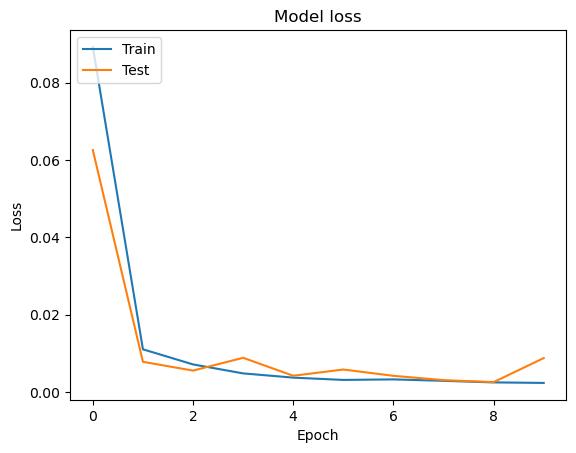

['loss', 'accuracy']
9331/9331 [==============================] - 118s 13ms/step - loss: 0.0088 - accuracy: 0.9967
Training Time: 4262.696s
Testing Time: 118.699s
9331/9331 [==============================] - 117s 13ms/step - loss: 0.0088 - accuracy: 0.9967
Validation Loss: 0.0088
Validation Accuracy: 0.9967


In [55]:
gru_bilstm = compile_train(gru_bilstm, format_3d(X_train), y_train, format_3d(X_test), y_test)


In [56]:
y_pred = gru_bilstm.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(gru_bilstm,format_3d(X_test),y_test,y_pred)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'GRU_Bilstm', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)


9331/9331 [==============================] - 105s 11ms/step - loss: 0.0088 - accuracy: 0.9967
[0.00875156745314598, 0.9967378973960876]

Accuracy
0.9967378708411202

Precision
0.9995766999528323

Recall
0.9965074452906778

F1 Score
0.9980397129205862

False Positive Rate (FPR)
0.0021100014066676043

Average (acc, prec, rec, f1, FPR)
0.7985943460823769

Testing Time: 105.359s
Training Time: 105.359s


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\2726611419.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'GRU_Bilstm', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,


In [68]:
from tensorflow.keras.layers import Dropout
input_size = 82
model_CNN_GRU = G_C_hybrid_model()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 80, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 40, 32)            0         
 D)                                                              
                                                                 
 conv1d_3 (Conv1D)           (None, 38, 16)            1552      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 19, 16)            0         
 g1D)                                                            
                                                                 
 dropout (Dropout)           (None, 19, 16)            0         
                                                                 
 gru_1 (GRU)                 (None, 19, 28)           

In [72]:
model_CNN_GRU = compile_train(model_CNN_GRU,format_3d(X_train), y_train, format_3d(X_test), y_test)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/binary_crossentropy/mul/BroadcastGradientArgs' defined at (most recent call last):
    File "C:\ProgramData\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\ProgramData\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\ProgramData\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\3469796774.py", line 1, in <module>
      model_CNN_GRU = compile_train(model_CNN_GRU,format_3d(X_train), y_train, format_3d(X_test), y_test)
    File "C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\3573857401.py", line 14, in compile_train
      history = model.fit(
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1084, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\optimizers\optimizer.py", line 543, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\optimizers\optimizer.py", line 276, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/binary_crossentropy/mul/BroadcastGradientArgs'
Incompatible shapes: [256,1] vs. [256,19,28]
	 [[{{node gradient_tape/binary_crossentropy/mul/BroadcastGradientArgs}}]] [Op:__inference_train_function_611590]

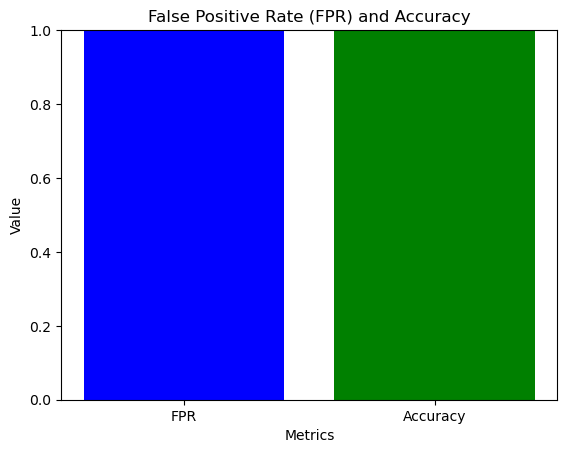

In [175]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.bar(['FPR', 'Accuracy'], [fpr * 100, acc *100], color=['blue', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('False Positive Rate (FPR) and Accuracy')
plt.ylim([0, 1])
plt.show()

In [73]:
from keras.models import Sequential 
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model_cnn = CNN_model(82)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 75, 64)            576       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 37, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 22, 32)            32800     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 11, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 9, 16)             1552      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 4, 16)            

Epoch 1/10
1440/1440 [==============================] - 47s 32ms/step - loss: 0.0823 - accuracy: 0.9740 - val_loss: 0.0510 - val_accuracy: 0.9793
Epoch 2/10
1440/1440 [==============================] - 38s 26ms/step - loss: 0.0386 - accuracy: 0.9886 - val_loss: 0.0615 - val_accuracy: 0.9714
Epoch 3/10
1440/1440 [==============================] - 38s 26ms/step - loss: 0.0328 - accuracy: 0.9902 - val_loss: 0.0351 - val_accuracy: 0.9835
Epoch 4/10
1440/1440 [==============================] - 44s 31ms/step - loss: 0.0300 - accuracy: 0.9909 - val_loss: 0.0315 - val_accuracy: 0.9825
Epoch 5/10
1440/1440 [==============================] - 59s 41ms/step - loss: 0.0280 - accuracy: 0.9916 - val_loss: 0.0352 - val_accuracy: 0.9843
Epoch 6/10
1440/1440 [==============================] - 58s 40ms/step - loss: 0.0273 - accuracy: 0.9918 - val_loss: 0.0278 - val_accuracy: 0.9871
Epoch 7/10
1440/1440 [==============================] - 57s 39ms/step - loss: 0.0258 - accuracy: 0.9923 - val_loss: 0.0271 -

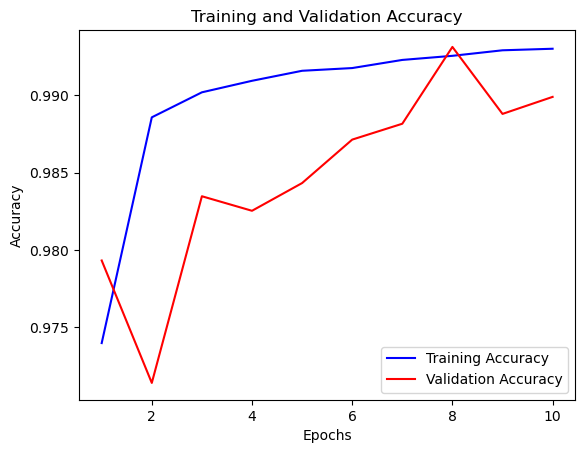

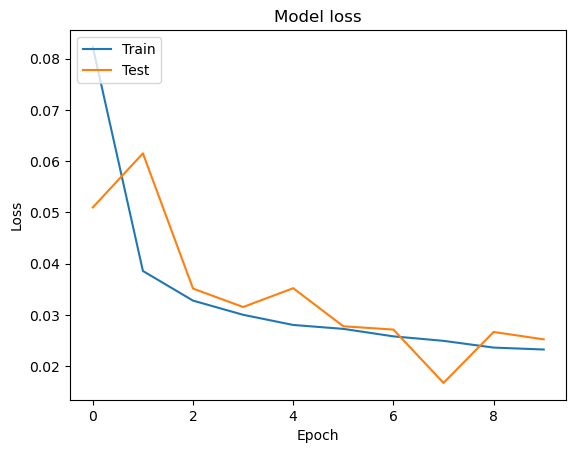

['loss', 'accuracy']
9331/9331 [==============================] - 23s 2ms/step - loss: 0.0252 - accuracy: 0.9899
Training Time: 482.453s
Testing Time: 22.751s
9331/9331 [==============================] - 28s 3ms/step - loss: 0.0252 - accuracy: 0.9899
Validation Loss: 0.0252
Validation Accuracy: 0.9899


In [74]:

model_cnn = compile_train(model_cnn,format_3d(X_train), y_train, format_3d(X_test), y_test)

In [75]:
y_pred = model_cnn.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(model_cnn,format_3d(X_test),y_test,y_pred)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'model_cnn', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)


9331/9331 [==============================] - 28s 3ms/step - loss: 0.0252 - accuracy: 0.9899
[0.025223618373274803, 0.989902138710022]

Accuracy
0.9899021361252336

Precision
0.9902508297166198

Recall
0.9977051222796053

F1 Score
0.9939640002162149

False Positive Rate (FPR)
0.049112794646625005

Average (acc, prec, rec, f1, FPR)
0.8041869765968597

Testing Time: 28.547s
Training Time: 28.547s


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\836278236.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'model_cnn', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,


In [79]:
def CNN_GRU_model(input_size):

    model = Sequential()
    
    model.add(Conv1D(64, 8, activation='relu', input_shape=(input_size,1), 
                     return_sequences=True))
    
    model.add(Conv1D(32, 16, activation='relu',  
                     return_sequences=True))
    
    # Rest of model
    
    return model
model_H_CNN_GRU = CNN_GRU_model(32)

TypeError: ('Keyword argument not understood:', 'return_sequences')

In [80]:
model_H_CNN_GRU = compile_train(model_H_CNN_GRU,format_3d(X_train), y_train, format_3d(X_test), y_test)

NameError: name 'model_H_CNN_GRU' is not defined

In [ ]:
y_pred = model_H_CNN_GRU.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(model_cnn,format_3d(X_test),y_test,y_pred)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'model_H_CNN_GRU', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)

In [81]:
import keras
from keras import layers

def devcnn_model(input_shape):
    model = keras.Sequential()
    
    model.add(layers.Conv1D(32, kernel_size=16, activation='relu', input_shape=input_shape))  
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(16, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    print(model.summary())  
    return model
 

In [82]:
def build_hybrid_model():
    model = keras.Sequential()
    hybrid_model = build_hybrid_model(82)
    # Conv1D layers
    model.add(layers.Conv1D(32, kernel_size=16, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(16, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    
    # LSTM layer
    model.add(layers.LSTM(64, return_sequences=True))
    
    # GRU layer
    model.add(layers.GRU(32, return_sequences=True))
    
    # Flatten layer
    model.add(layers.Flatten())
    
    # Dense layers
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    print(model.summary())
    return model

In [86]:
hybrid_model = build_hybrid_model(82)

TypeError: build_hybrid_model() takes 0 positional arguments but 1 was given

In [87]:
CNN_DEV = devcnn_model(input_shape=(82, 1))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 67, 32)            544       
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 33, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 31, 16)            1552      
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 15, 16)            0         
 ng1D)                                                           
                                                                 
 flatten_2 (Flatten)         (None, 240)               0         
                                                                 
 dense_6 (Dense)             (None, 64)              

Epoch 1/10
1440/1440 [==============================] - 22s 15ms/step - loss: 0.0661 - accuracy: 0.9805 - val_loss: 0.0260 - val_accuracy: 0.9917
Epoch 2/10
1440/1440 [==============================] - 24s 17ms/step - loss: 0.0329 - accuracy: 0.9899 - val_loss: 0.0311 - val_accuracy: 0.9861
Epoch 3/10
1440/1440 [==============================] - 17s 12ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0260 - val_accuracy: 0.9904
Epoch 4/10
1440/1440 [==============================] - 16s 11ms/step - loss: 0.0259 - accuracy: 0.9922 - val_loss: 0.0243 - val_accuracy: 0.9898
Epoch 5/10
1440/1440 [==============================] - 16s 11ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0286 - val_accuracy: 0.9882
Epoch 6/10
1440/1440 [==============================] - 15s 11ms/step - loss: 0.0236 - accuracy: 0.9929 - val_loss: 0.0421 - val_accuracy: 0.9822
Epoch 7/10
1440/1440 [==============================] - 16s 11ms/step - loss: 0.0223 - accuracy: 0.9933 - val_loss: 0.0206 -

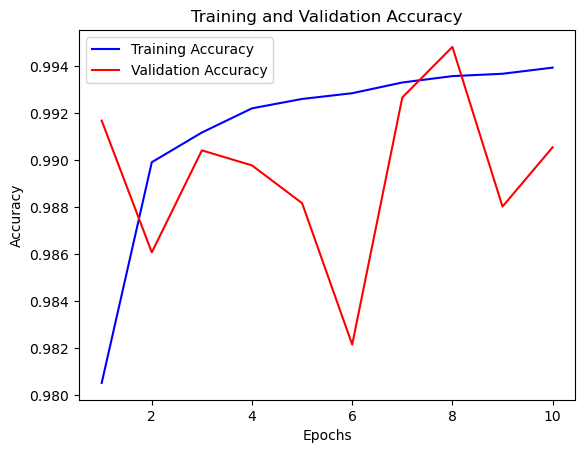

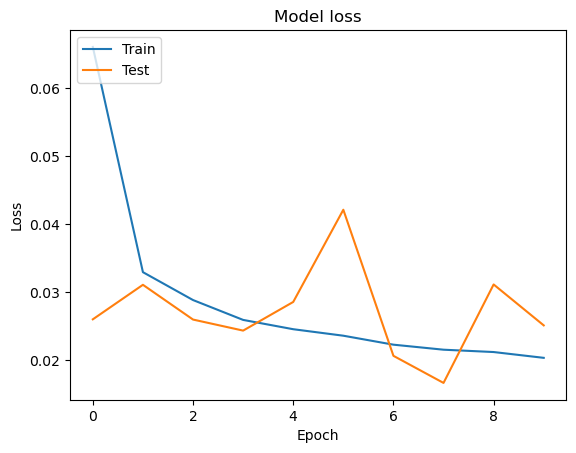

['loss', 'accuracy']
9331/9331 [==============================] - 11s 1ms/step - loss: 0.0251 - accuracy: 0.9906
Training Time: 174.606s
Testing Time: 11.609s
9331/9331 [==============================] - 12s 1ms/step - loss: 0.0251 - accuracy: 0.9906
Validation Loss: 0.0251
Validation Accuracy: 0.9906


In [88]:
CNN_DEV = compile_train(CNN_DEV, format_3d(X_train), y_train, format_3d(X_test), y_test)

In [90]:
y_pred = CNN_DEV.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(CNN_DEV,format_3d(X_test),y_test,y_pred)
#acc,fpr, prec, rec, f1, avrg = testes(model_cnn, format_3d(X_train), y_train, format_3d(X_test), y_test)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'CNN_DEV', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk,'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)


9331/9331 [==============================] - 12s 1ms/step - loss: 0.0251 - accuracy: 0.9906
[0.025104418396949768, 0.9905585646629333]

Accuracy
0.990558581007308

Precision
0.9908336326270003

Recall
0.9979020557442276

F1 Score
0.994355282786516

False Positive Rate (FPR)
0.04615879267729035

Average (acc, prec, rec, f1, FPR)
0.8039616689684685

Testing Time: 12.310s
Training Time: 12.310s


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\25345529.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'CNN_DEV', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,


In [91]:
from keras.layers import GRU
model_gru = GRU_model(82)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 32)                3360      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3701 (14.46 KB)
Trainable params: 3701 (14.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/10
1440/1440 [==============================] - 63s 42ms/step - loss: 0.1932 - accuracy: 0.9420 - val_loss: 0.0609 - val_accuracy: 0.9965
Epoch 2/10
1440/1440 [==============================] - 62s 43ms/step - loss: 0.0609 - accuracy: 0.9865 - val_loss: 0.0424 - val_accuracy: 0.9975
Epoch 3/10
1440/1440 [==============================] - 70s 49ms/step - loss: 0.0535 - accuracy: 0.9868 - val_loss: 0.0297 - val_accuracy: 0.9976
Epoch 4/10
1440/1440 [==============================] - 61s 42ms/step - loss: 0.0478 - accuracy: 0.9870 - val_loss: 0.0630 - val_accuracy: 0.9922
Epoch 5/10
1440/1440 [==============================] - 61s 42ms/step - loss: 0.0438 - accuracy: 0.9876 - val_loss: 0.0151 - val_accuracy: 0.9979
Epoch 6/10
1440/1440 [==============================] - 79s 55ms/step - loss: 0.0383 - accuracy: 0.9891 - val_loss: 0.0150 - val_accuracy: 0.9966
Epoch 7/10
1440/1440 [==============================] - 61s 43ms/step - loss: 0.0332 - accuracy: 0.9900 - val_loss: 0.0128 -

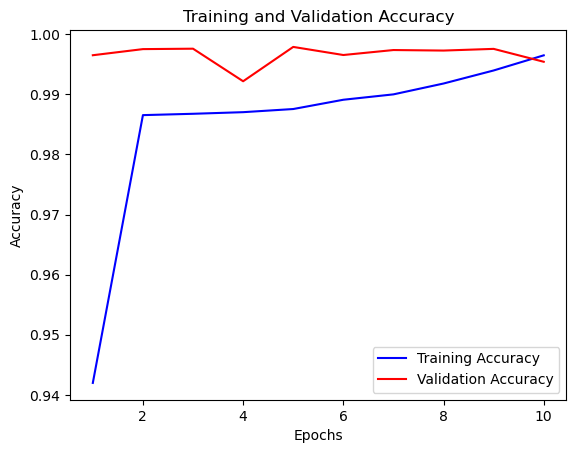

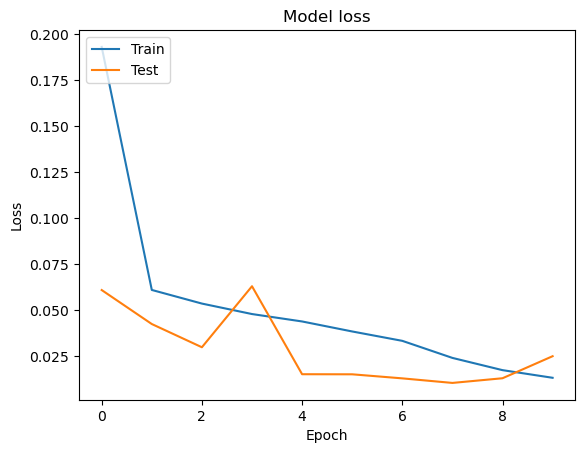

['loss', 'accuracy']
9331/9331 [==============================] - 52s 6ms/step - loss: 0.0249 - accuracy: 0.9954
Training Time: 723.358s
Testing Time: 52.515s
9331/9331 [==============================] - 58s 6ms/step - loss: 0.0249 - accuracy: 0.9954
Validation Loss: 0.0249
Validation Accuracy: 0.9954


In [92]:
model_gru = compile_train(model_gru, format_3d(X_train), y_train, format_3d(X_test), y_test)

In [93]:
y_pred = model_gru.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(model_gru,format_3d(X_test),y_test,y_pred)
#acc,fpr, prec, rec, f1, avrg = testes(model_cnn, format_3d(X_train), y_train, format_3d(X_test), y_test)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'GRU', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)


9331/9331 [==============================] - 56s 6ms/step - loss: 0.0249 - accuracy: 0.9954
[0.024863602593541145, 0.9954283237457275]

Accuracy
0.9954283302855536

Precision
0.9995195568618584

Recall
0.9949922633281756

F1 Score
0.9972507718986592

False Positive Rate (FPR)
0.0023913349275566185

Average (acc, prec, rec, f1, FPR)
0.7979164514603606

Testing Time: 56.804s
Training Time: 56.804s


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\3881572347.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'GRU', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,


In [94]:
model_dnn = DNN_model(X_train.shape[1])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 166       
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/10
1440/1440 [==============================] - 5s 3ms/step - loss: 0.2683 - accuracy: 0.9517 - val_loss: 0.0839 - val_accuracy: 0.9979
Epoch 2/10
1440/1440 [==============================] - 5s 3ms/step - loss: 0.1008 - accuracy: 0.9891 - val_loss: 0.0439 - val_accuracy: 0.9980
Epoch 3/10
1440/1440 [==============================] - 3s 2ms/step - loss: 0.0646 - accuracy: 0.9894 - val_loss: 0.0387 - val_accuracy: 0.9984
Epoch 4/10
1440/1440 [==============================] - 3s 2ms/step - loss: 0.0515 - accuracy: 0.9906 - val_loss: 0.0275 - val_accuracy: 0.9988
Epoch 5/10
1440/1440 [==============================] - 4s 3ms/step - loss: 0.0464 - accuracy: 0.9911 - val_loss: 0.0211 - val_accuracy: 0.9988
Epoch 6/10
1440/1440 [==============================] - 4s 2ms/step - loss: 0.0447 - accuracy: 0.9912 - val_loss: 0.0236 - val_accuracy: 0.9987
Epoch 7/10
1440/1440 [==============================] - 3s 2ms/step - loss: 0.0441 - accuracy: 0.9912 - val_loss: 0.0134 - val_accuracy:

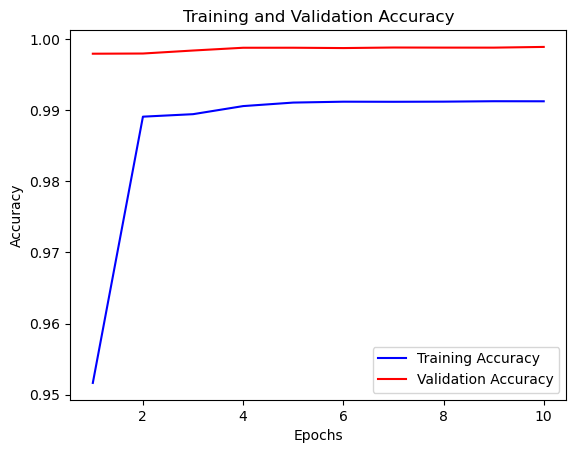

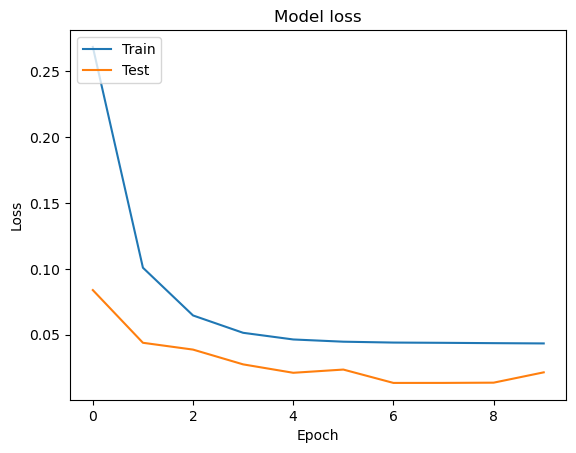

['loss', 'accuracy']
9331/9331 [==============================] - 16s 2ms/step - loss: 0.0215 - accuracy: 0.9989
Training Time: 40.080s
Testing Time: 16.401s
9331/9331 [==============================] - 14s 2ms/step - loss: 0.0215 - accuracy: 0.9989
Validation Loss: 0.0215
Validation Accuracy: 0.9989


In [95]:
model_dnn = compile_train(model_dnn,format_3d(X_train), y_train, format_3d(X_test), y_test)

In [96]:
y_pred = model_dnn.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(model_dnn,format_3d(X_test),y_test,y_pred)
#acc,fpr, prec, rec, f1, avrg = testes(model_cnn, format_3d(X_train), y_train, format_3d(X_test), y_test)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'DNN', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)


9331/9331 [==============================] - 13s 1ms/step - loss: 0.0215 - accuracy: 0.9989
[0.021469304338097572, 0.9988947510719299]

Accuracy
0.998894761167936

Precision
0.9993850259856667

Recall
0.9992886280971807

F1 Score
0.9993368247167439

False Positive Rate (FPR)
0.0030745734782870807

Average (acc, prec, rec, f1, FPR)
0.7999959626891628

Testing Time: 13.651s
Training Time: 13.651s


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\1545666923.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'DNN', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,


In [97]:
 model_ann = ANN_model(71)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                4608      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6721 (26.25 KB)
Trainable params: 6721 (26.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [99]:
from tensorflow import keras
from tensorflow.keras import layers

def build_hybrid_model():
    model = keras.Sequential()
    
    # Conv1D layers
    model.add(layers.Conv1D(32, kernel_size=16, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(16, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    
    # LSTM layer
    model.add(layers.LSTM(64, return_sequences=True))
    
    # GRU layer
    model.add(layers.GRU(32, return_sequences=True))
    
    # Flatten layer
    model.add(layers.Flatten())
    
    # Dense layers
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

# Build the hybrid model
model = build_hybrid_model()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}') 
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/30
5760/5760 [==============================] - 141s 24ms/step - loss: 0.0498 - accuracy: 0.9848 - val_loss: 0.0350 - val_accuracy: 0.9869
Epoch 2/30
5760/5760 [==============================] - 136s 24ms/step - loss: 0.0317 - accuracy: 0.9906 - val_loss: 0.0293 - val_accuracy: 0.9881
Epoch 3/30
5760/5760 [==============================] - 152s 26ms/step - loss: 0.0272 - accuracy: 0.9919 - val_loss: 0.0335 - val_accuracy: 0.9877
Epoch 4/30
5760/5760 [==============================] - 155s 27ms/step - loss: 0.0231 - accuracy: 0.9933 - val_loss: 0.0306 - val_accuracy: 0.9874
Epoch 5/30
5760/5760 [==============================] - 155s 27ms/step - loss: 0.0211 - accuracy: 0.9938 - val_loss: 0.0360 - val_accuracy: 0.9872
Epoch 6/30
5760/5760 [==============================] - 170s 30ms/step - loss: 0.0198 - accuracy: 0.9943 - val_loss: 0.0298 - val_accuracy: 0.9882
Epoch 7/30
5760/5760 [==============================] - 160s 28ms/step - loss: 0.0191 - accuracy: 0.9944 - val_loss: 0

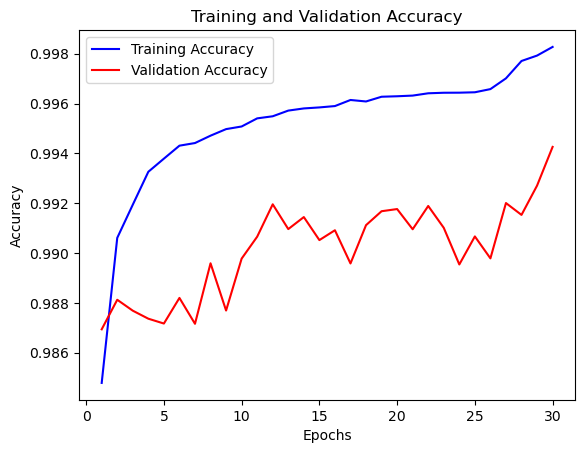

In [100]:
# Plot the accuracy graph
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

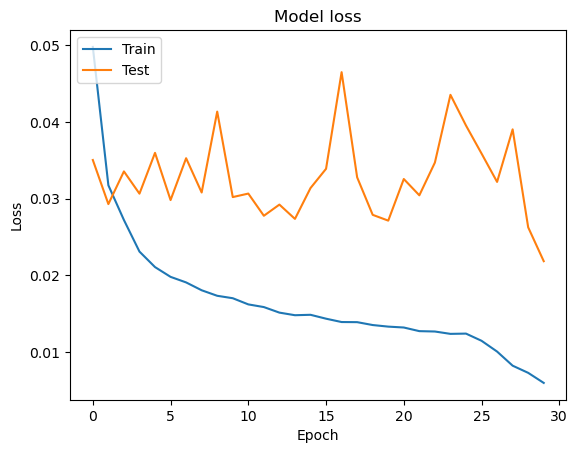

In [102]:
y_pred = model.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(model,format_3d(X_test),y_test,y_pred)
#acc,fpr, prec, rec, f1, avrg = testes(model_cnn, format_3d(X_train), y_train, format_3d(X_test), y_test)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'CNN_LSTM_GRU', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)


9331/9331 [==============================] - 32s 3ms/step - loss: 0.0218 - accuracy: 0.9943
[0.021829552948474884, 0.9942594766616821]

Accuracy
0.9942594564904313

Precision
0.9946630259401762

Recall
0.9984687418363041

F1 Score
0.9965622505425387

False Positive Rate (FPR)
0.02678697023893254

Average (acc, prec, rec, f1, FPR)
0.8021480890096765

Testing Time: 32.414s
Training Time: 32.414s


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\2086103191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'CNN_LSTM_GRU', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,


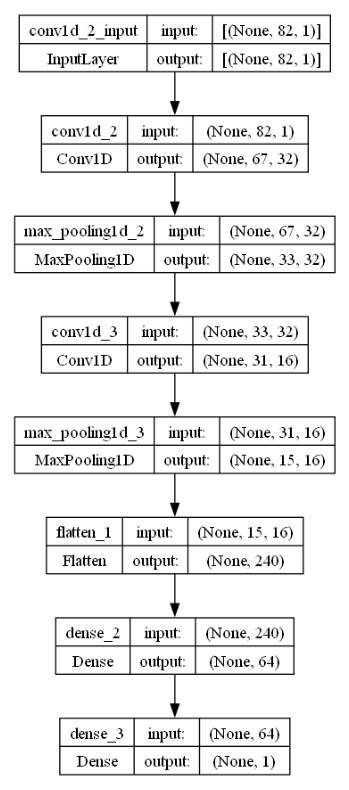

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

def devcnn_model(input_shape):
    model = keras.Sequential([
        layers.Conv1D(32, kernel_size=16, activation='relu', input_shape=input_shape),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(16, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Define input shape (you need to specify this based on your data)
input_shape = (82, 1)  # Assuming 82 features and 1 channel

# Build the model
model = devcnn_model(input_shape)

# Plot the model
plot_model(model, to_file='model-CNN_visualization.png', show_shapes=True, show_layer_names=True)

# Display the generated image using matplotlib
plt.figure(figsize=(15, 10))
plt.imshow(plt.imread('model-CNN_visualization.png'))
plt.axis('off')
plt.show()

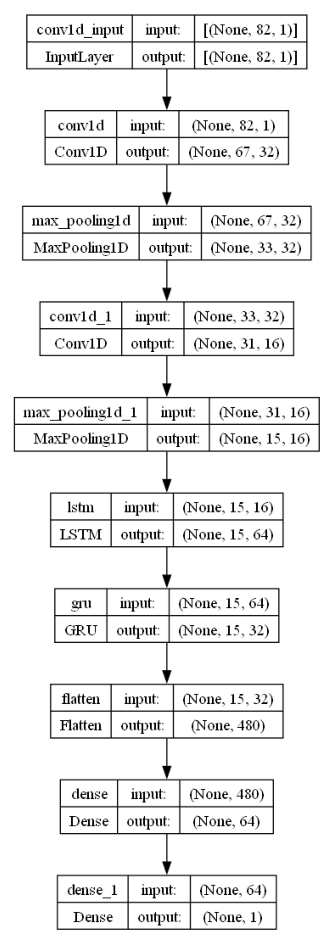

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

def build_hybrid_model():
    model = keras.Sequential([
        layers.Conv1D(32, kernel_size=16, activation='relu', input_shape=(82, 1)),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(16, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.LSTM(64, return_sequences=True),
        layers.GRU(32, return_sequences=True),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build the model
model = build_hybrid_model()

# Plot the model
plot_model(model, to_file='model_visualizationCGL.png', show_shapes=True, show_layer_names=True)

# Display the generated image using matplotlib
plt.figure(figsize=(15, 12))
plt.imshow(plt.imread('model_visualizationCGL.png'))
plt.axis('off')
plt.show()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirecti  (None, 64)                8704      
 onal)                                                           
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9365 (36.58 KB)
Trainable params: 9365 (36.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/30
5760/5760 [==============================] - 145s 25ms/step - loss: 0.0757 - accuracy: 0.9784 - val_loss: 0.0370 - val_accuracy: 0.9917
Epoch 2/30
5760/5760 [==============================] - 162s 28ms

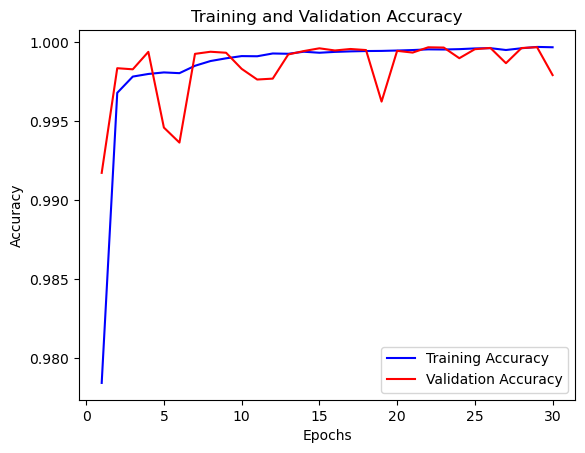

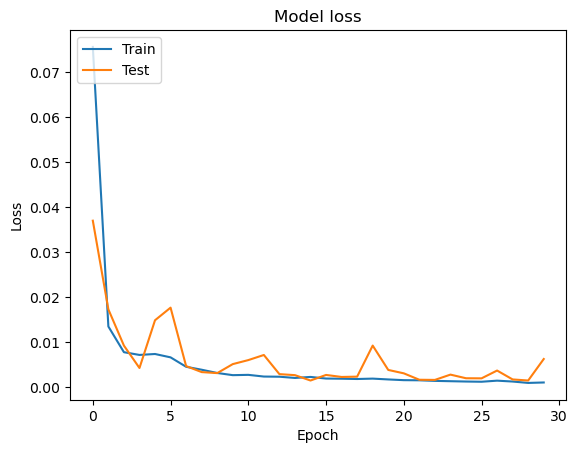

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
input_size = 82
def BiLSTM_model(input_size):
    model = keras.Sequential()
    model.add(Bidirectional(LSTM(32), input_shape=(input_size, 1)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    print(model.summary())
 
    return model

# Build the hybrid model
model = BiLSTM_model(82)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}') 
print(f'Test Accuracy: {accuracy:.4f}')
# Plot the accuracy graph
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [184]:
y_pred = BiLSTM_model.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(BiLSTM_model,format_3d(X_test),y_test,y_pred)
#acc,fpr, prec, rec, f1, avrg = testes(model_cnn, format_3d(X_train), y_train, format_3d(X_test), y_test)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':' BiLSTM_model2', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)


AttributeError: 'function' object has no attribute 'predict'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from keras.utils import plot_model
from keras.models import Sequential
input_size = 82
def BiLSTM_model(input_size):
    model = keras.Sequential()
    model.add(Bidirectional(LSTM(32), input_shape=(input_size, 1)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    print(model.summary())
 
    return model

# Build the hybrid model
model = BiLSTM_model(82)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}') 
print(f'Test Accuracy: {accuracy:.4f}')
# Plot the accuracy graph
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'keras' is not defined

In [132]:
y_pred = model_gnb.predict(X_test) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(model_gnb,X_test,y_test,y_pred,False)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'NB', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)



Accuracy
0.9133325295232736

Precision
0.9896034646333322

Recall
0.9055121274842755

F1 Score
0.9456921175184213

False Positive Rate (FPR)
0.047565460281735424

Average (acc, prec, rec, f1, FPR)
0.7603411398882076

Testing Time: 0.364s
Training Time: 0.364s


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\2077553656.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'NB', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,


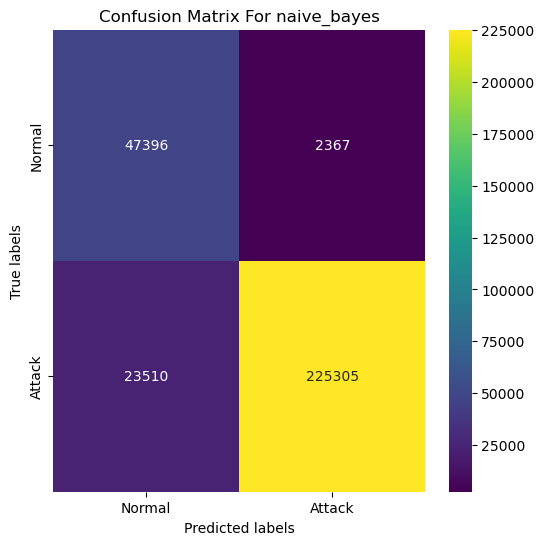

In [133]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
samples = y_test  # Actual labels
y_pred = model_gnb.predict(X_test) 

# Use y_test here instead of y_true
cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(cm, 
            annot=True,
            fmt='g',
            ax=ax,
            cmap=plt.cm.viridis);

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For naive_bayes'); 
ax.xaxis.set_ticklabels(['Normal', 'Attack']) 
ax.yaxis.set_ticklabels(['Normal', 'Attack']);

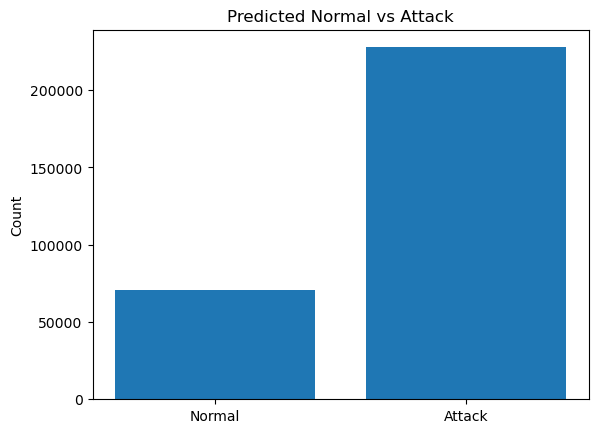

In [135]:
import matplotlib.pyplot as plt

y_pred = model_gnb.predict(X_test) 
y_pred = y_pred.round()

normal_count = (y_pred == 0).sum()
attack_count = (y_pred == 1).sum()

plt.bar([0, 1], [normal_count, attack_count])
plt.xticks([0, 1], ['Normal', 'Attack'])
plt.ylabel('Count')
plt.title('Predicted Normal vs Attack')

plt.show()

In [136]:
from sklearn.linear_model import LogisticRegression
model_lr = LR()

In [137]:
model_lr.fit(X_train, y_train) 
y_pred = model_lr.predict(X_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [138]:
y_pred = model_lr.predict(X_test) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(model_lr,X_test,y_test,y_pred,False)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'LR', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)



Accuracy
0.9972804426314062

Precision
0.9990140567339925

Recall
0.997721198480799

F1 Score
0.9983672090535443

False Positive Rate (FPR)
0.004923336615557744

Average (acc, prec, rec, f1, FPR)
0.79946124870306

Testing Time: 0.415s
Training Time: 0.415s


C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\3146394463.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'LR', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,


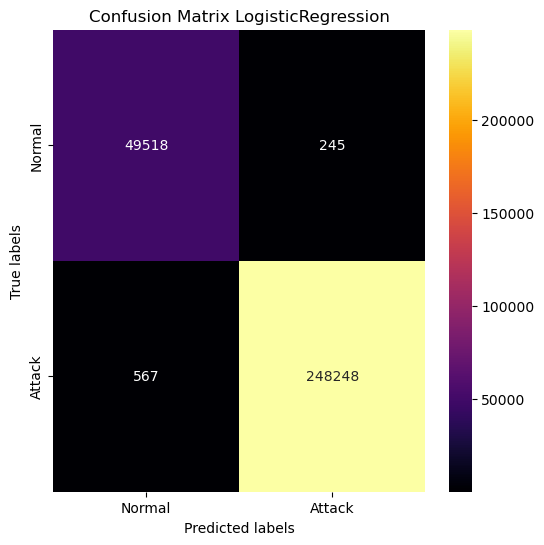

In [139]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
samples = y_test  # القيم الحقيقية Labels
y_pred = model_lr.predict(X_test) # القيم المتنبأ بها Predicted

 
cm = confusion_matrix(y_test, y_pred) 

plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(cm, 
            annot=True,  
            fmt='g',
            ax=ax,
            cmap=plt.cm.inferno); #defines heatmap

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix LogisticRegression'); 
ax.xaxis.set_ticklabels(['Normal', 'Attack']) 
ax.yaxis.set_ticklabels(['Normal', 'Attack']);

In [164]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((368604, 82), (298578, 82), (368604,), (298578,))

In [165]:
print(y_train.value_counts())#368,604

0    184302
1    184302
Name:  Label, dtype: int64


In [166]:
print(y_test.value_counts())#298,578

1    248815
0     49763
Name:  Label, dtype: int64


In [183]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(models, names, X_test, y_test):
    plt.figure(figsize=(10, 8))

    for model, name in zip(models, names):
        
        y_pred_prob = model.predict(X_test)

        #  
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

         
        plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

     
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity (False Positive Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

models = [  model_cnn, CNN_DEV, model_gru, model_dnn, build_hybrid_model]  # قائمة النماذج
names = [ "CNN", "CNN_DEV", "GRU", "DNN", "CNN_LSTM_GRU"]  # أسماء النماذج
plot_roc_curves(models, names, X_test, y_test)


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_5/conv1d_4/Conv1D' defined at (most recent call last):
    File "C:\ProgramData\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\ProgramData\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\ProgramData\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\2915733078.py", line 31, in <module>
      plot_roc_curves(models, names, X_test, y_test)
    File "C:\Users\M.A\AppData\Local\Temp\ipykernel_3628\2915733078.py", line 9, in plot_roc_curves
      y_pred_prob = model.predict(X_test)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2554, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function
      return step_function(self, iterator)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2327, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2315, in run_step
      outputs = model.predict_step(data)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
      return self(x, training=False)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 290, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 262, in convolution_op
      return tf.nn.convolution(
Node: 'sequential_5/conv1d_4/Conv1D'
convolution input must be 4-dimensional: [1,32,82]
	 [[{{node sequential_5/conv1d_4/Conv1D}}]] [Op:__inference_predict_function_4758556]

<Figure size 1000x800 with 0 Axes>

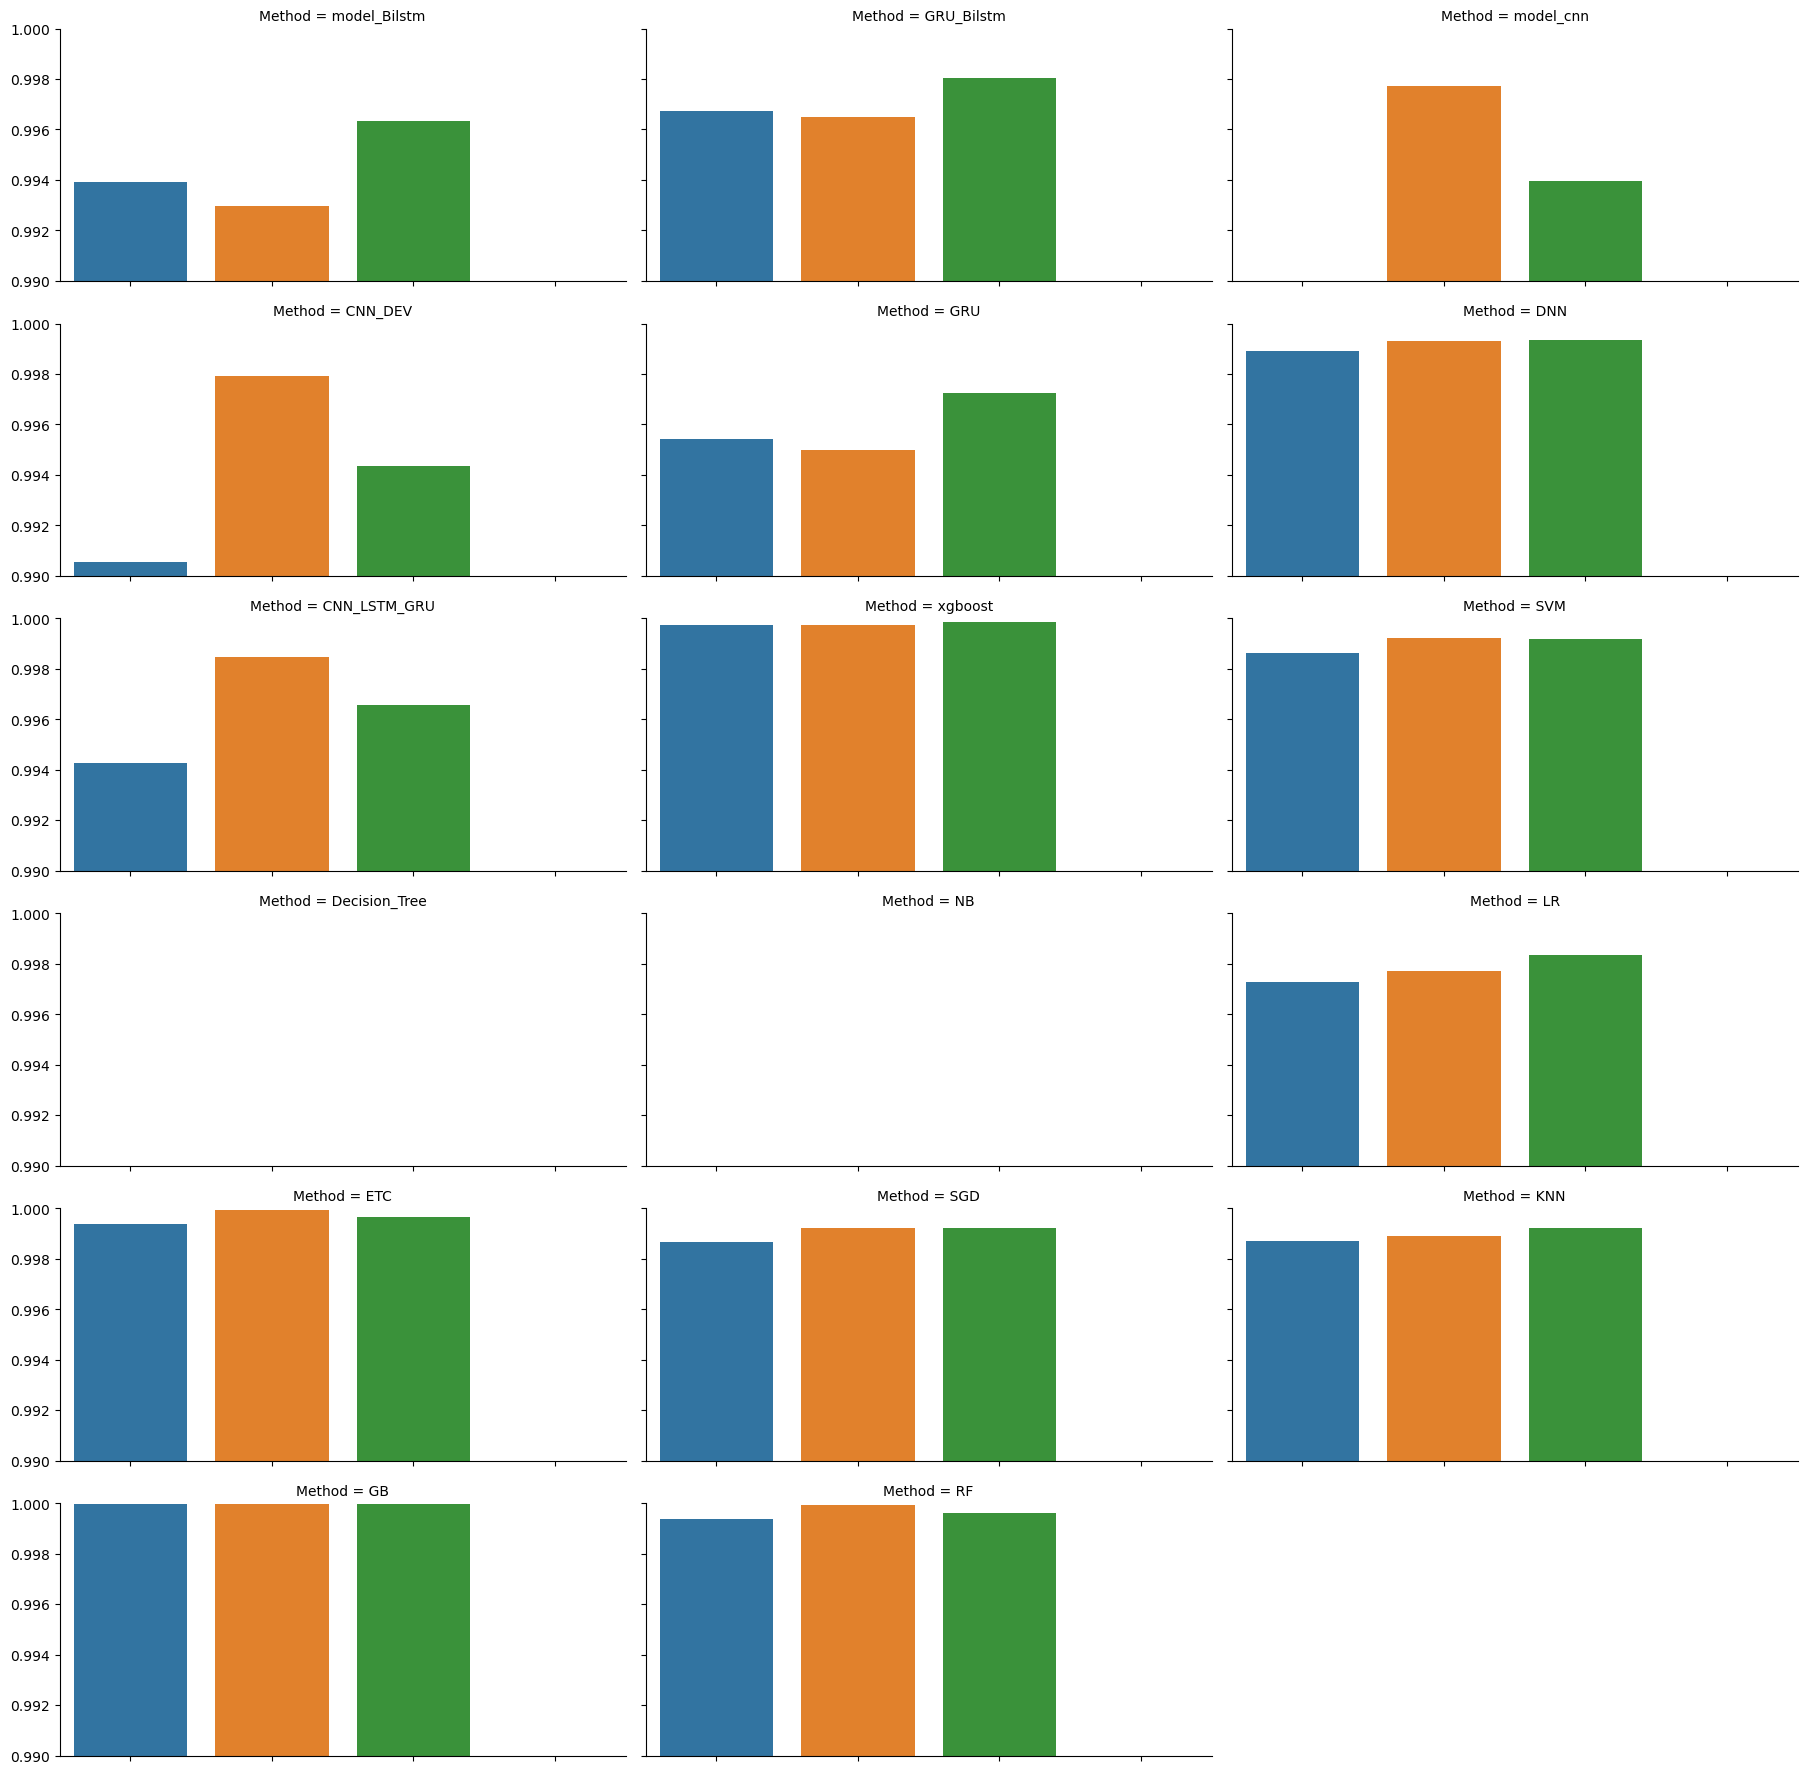

In [171]:
ax = sns.catplot(data=results.iloc[:,:5].query('Method != "LSTM" and Method != "CNN"'), col='Method', col_wrap=3, kind='bar', height=3, aspect=2)
ax.set(ylim=(0.99,1))
ax.set_xticklabels(rotation=45)
ax = ax

In [186]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

NameError: name 'df' is not defined

In [188]:
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectKBest 
from sklearn.ensemble import ExtraTreesClassifier

selecting 20 best features
elect_best= SelectKBest(chi2, k=20)
X_feat_20 = select_best.fit_transform(data_X, data_y_trans)
X_feat_20.shape


SyntaxError: invalid syntax (984686663.py, line 5)

In [189]:
model.feature_importances_

AttributeError: 'Sequential' object has no attribute 'feature_importances_'

In [190]:
# DRAWN feature
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

AttributeError: 'Sequential' object has no attribute 'feature_importances_'

In [191]:
# RoC curve Function 

def RoC_Curve(classifier, X_val, y_val, title): 
        """ RoC Curve for Classifier 
        Parameters: 
        ------------
        classifier: Machine Learning Classifier to be Evaluated
        X_val: Validation Dataset
        y_val: Label/Target of Validation Dataset

        Attributes:
        Plots the Graph    
        
        Note: Some part of this Method code is taken 
            from Sklearn Website
        """

        lw = 2
        n_classes = 12
        y_test1 = to_categorical(y_val)
        pred_RFC_proba = classifier.predict_proba(X_val)
        y_score = pred_RFC_proba

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(20,10))
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        list_class = ['BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL', 'DrDoS_NTP', 'DrDoS_NetBIOS', 'DrDoS_SNMP', 'DrDoS_SSDP', 'DrDoS_UDP', 'Syn', 'UDP-lag', 'WebDDoS']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(list_class[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title) 
        plt.legend(loc="lower right")
        plt.show()



In [192]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 

ModuleNotFoundError: No module named 'keras.utils.np_utils'

In [193]:
title = 'Receiver operating characteristic of Random Forest'
RoC_Curve(rf, X_test_std_20, y_test_20, title)

NameError: name 'rf' is not defined

In [194]:
print("Classification Report for Decision Tree: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(dt_y_pred)))

NameError: name 'classification_report' is not defined

In [195]:
dt_conf_mat = confusion_matrix(y_test_20, dt_y_pred)
print("Decision Tree Confusion: \n", dt_conf_mat)

NameError: name 'y_test_20' is not defined

In [196]:
acc_score_dt = accuracy_score(y_test_20, dt_y_pred)
print("Accuracy Score for Decision Tree: \n", acc_score_dt*100)

NameError: name 'y_test_20' is not defined

In [ ]:
# RoC Curve 
title = 'Receiver operating characteristic of Decision Tree'
RoC_Curve(dt, X_test_std_20, y_test_20, title)

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sn

def compile_train(model, X_train, y_train, X_val, y_val, deep=True):

    # Training code....
    
    # Evaluate model
    y_pred = model.predict(X_val)
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred > 0.5)  
    df_cm = pd.DataFrame(cm, index=[i for i in "YN"],
                  columns=[i for i in "YN"])
    plt.figure(figsize=(5,5))
    sn.heatmap(df_cm, annot=True)
    plt.show()
    
    return model